# P2: Analyzing COVID-19 Cases in India

### 1. Import, explore, and prepare the dataset for drawing plots and charts.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covid_df = pd.read_csv('covid.csv')
covid_data_df = pd.read_csv('covid_data.csv')

covid_data_df['date'] = pd.to_datetime(covid_data_df['date'], format='%d-%m-%Y')

print("--- covid.csv Information ---")
covid_df.info()
print("\n--- covid_data.csv Information ---")
covid_data_df.info()

print("\n--- First 5 rows of covid.csv ---")
print(covid_df.head())
print("\n--- First 5 rows of covid_data.csv ---")
print(covid_data_df.head())

--- covid.csv Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            36 non-null     object
 1   confirmed        36 non-null     int64 
 2   active           36 non-null     int64 
 3   passive          36 non-null     int64 
 4   deaths           36 non-null     int64 
 5   dose1            36 non-null     int64 
 6   dose2            36 non-null     int64 
 7   dose3            36 non-null     int64 
 8   precaution_dose  36 non-null     int64 
 9   total_doses      36 non-null     int64 
 10  population       36 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.2+ KB

--- covid_data.csv Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28568 entries, 0 to 28567
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  ----- 

**Interpretation:** The datasets covid.csv (state-wise summary) and covid_data.csv (daily time-series) have been successfully loaded and explored.

The covid.csv file contains a snapshot of cumulative data for 36 states and union territories across 11 columns, with no missing values. It summarizes the total confirmed cases, deaths, and vaccination doses for each region.

The covid_data.csv file provides a detailed, daily record of the pandemic's progression, containing 28,568 entries. A crucial preparation step has been performed by converting the date column into a proper datetime format, which is essential for any time-series analysis.

### 2. Draw Bar Plot: Total Confirmed Cases by State

C:\Users\pokem\AppData\Local\Temp\ipykernel_61992\2567640462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='confirmed', y='state', data=sorted_df, palette='viridis')


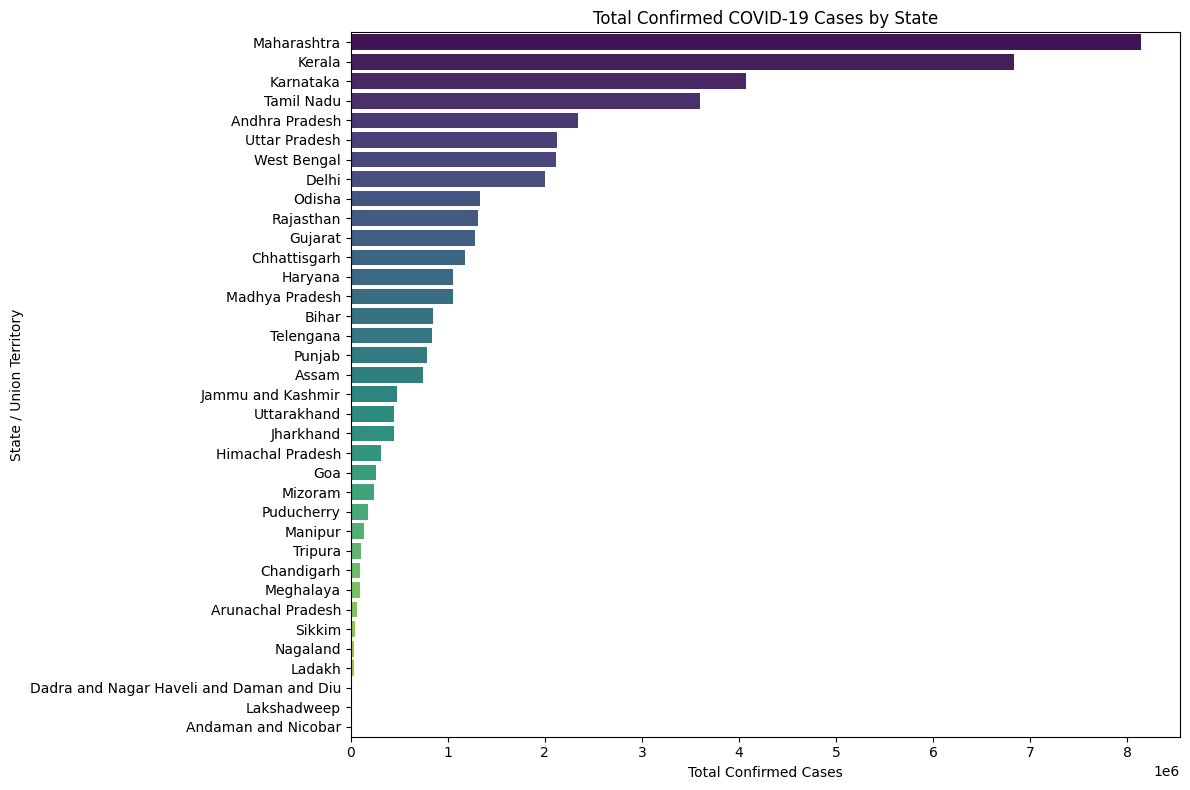

In [3]:
sorted_df = covid_df.sort_values(by='confirmed', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='confirmed', y='state', data=sorted_df, palette='viridis')
plt.title('Total Confirmed COVID-19 Cases by State')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('State / Union Territory')
plt.tight_layout()
plt.show()

**Interpretation:** This bar plot visualizes the total confirmed COVID-19 cases for each state, sorted from highest to lowest. It clearly shows that a few states, such as Maharashtra, Kerala, and Karnataka, have significantly higher case counts compared to others, highlighting the regional disparities in the pandemic's impact.

### 3. Draw Line Chart: Daily New Cases Over Time

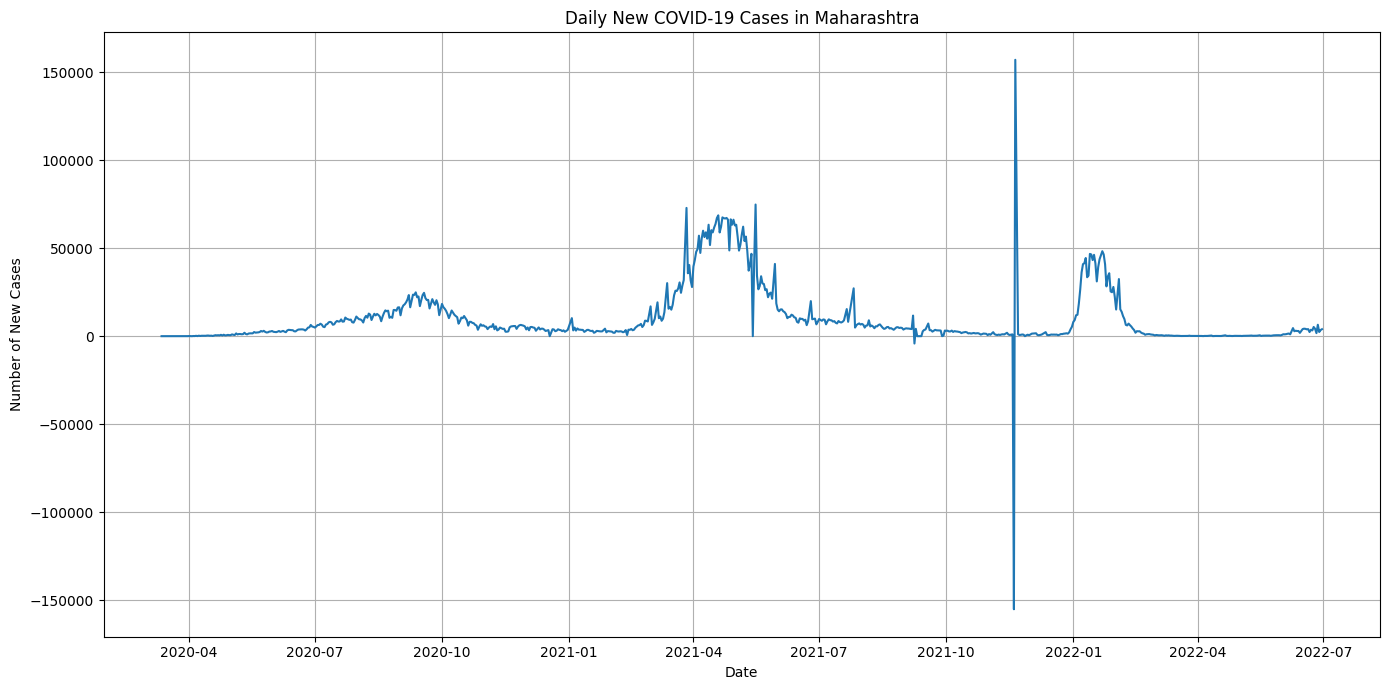

In [4]:
mh_df = covid_data_df[covid_data_df['region'] == 'Maharashtra'].copy()
mh_df.sort_values(by='date', inplace=True)
mh_df['daily_new_cases'] = mh_df['confirmed'].diff().fillna(0)
#mh_df.set_index('date', inplace=True)

plt.figure(figsize=(14, 7))
#mh_df['daily_new_cases'].plot(kind='line', color='purple')
sns.lineplot(y='daily_new_cases', x='date', data=mh_df)
plt.title('Daily New COVID-19 Cases in Maharashtra')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation:** This line chart illustrates the daily new confirmed cases of COVID-19 specifically for the state of Maharashtra. The plot clearly highlights the different waves of the pandemic as experienced in the state, marked by significant peaks in the daily case numbers, followed by periods of decline.

### 4. Draw Histogram: Distribution of Total Confirmed Cases

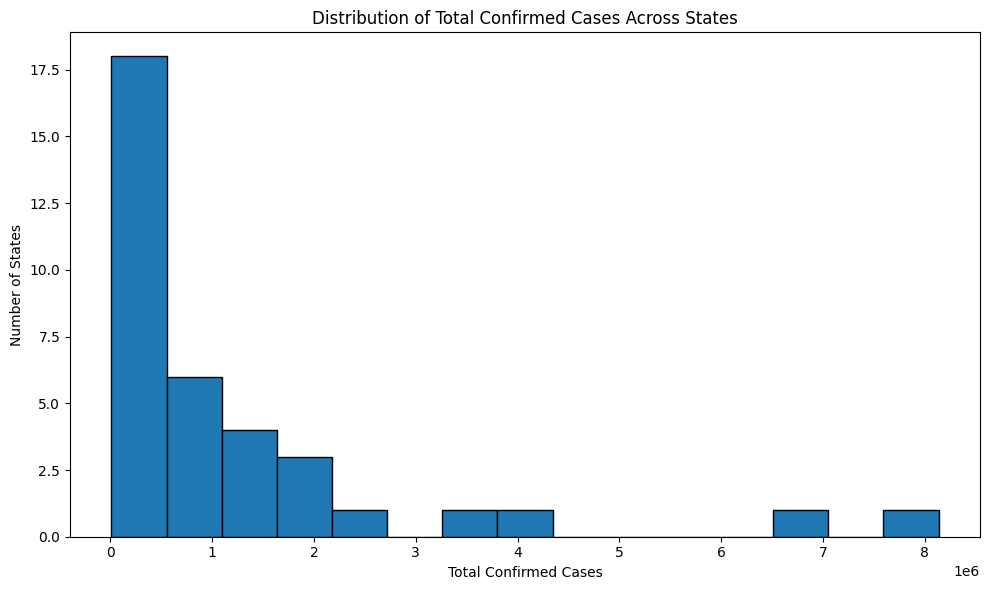

In [5]:
#covid_df['confirmed'].plot(kind='hist', bins=15, figsize=(10, 6), edgecolor='black')
plt.figure(figsize=(10,6))
plt.hist(covid_df['confirmed'], bins=15, edgecolor='black')
plt.title('Distribution of Total Confirmed Cases Across States')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Number of States')
plt.tight_layout()
plt.show()

**Interpretation:** The histogram shows the distribution of total confirmed cases across the states. The data is heavily skewed to the right, indicating that most states have a lower number of total cases, while a few states have a significantly higher number.

### 5. Draw Box Plot: Active Cases by State

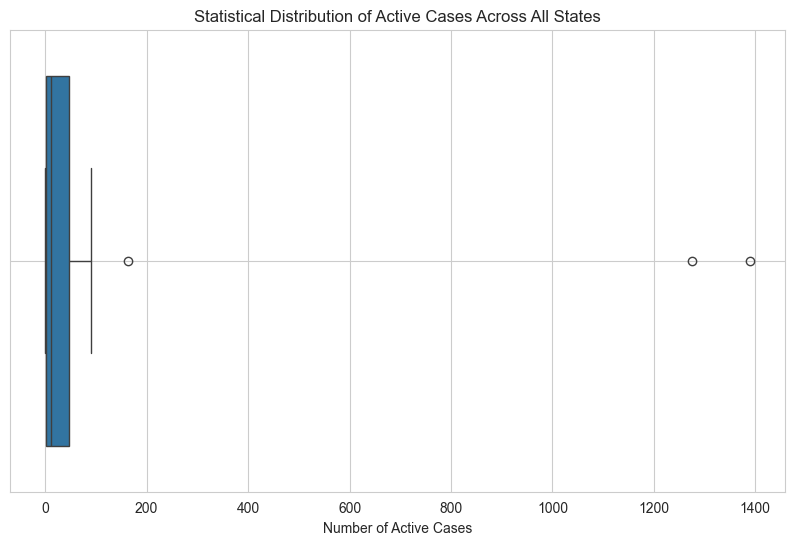

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=covid_df['active'])

plt.title('Statistical Distribution of Active Cases Across All States')
plt.xlabel('Number of Active Cases')
plt.grid(True)
plt.show()

**Interpretation:** A box plot summarizes the distribution of a dataset. In this horizontal box plot, we can see that the active cases for most states are clustered in a very narrow range near zero. The points to the right are outliers, representing states like Kerala and Karnataka, which have a significantly higher number of active cases compared to the vast majority of other states. This indicates a highly concentrated distribution of active cases.

### 6. Draw Pie Chart: Proportion of Total Cases by State

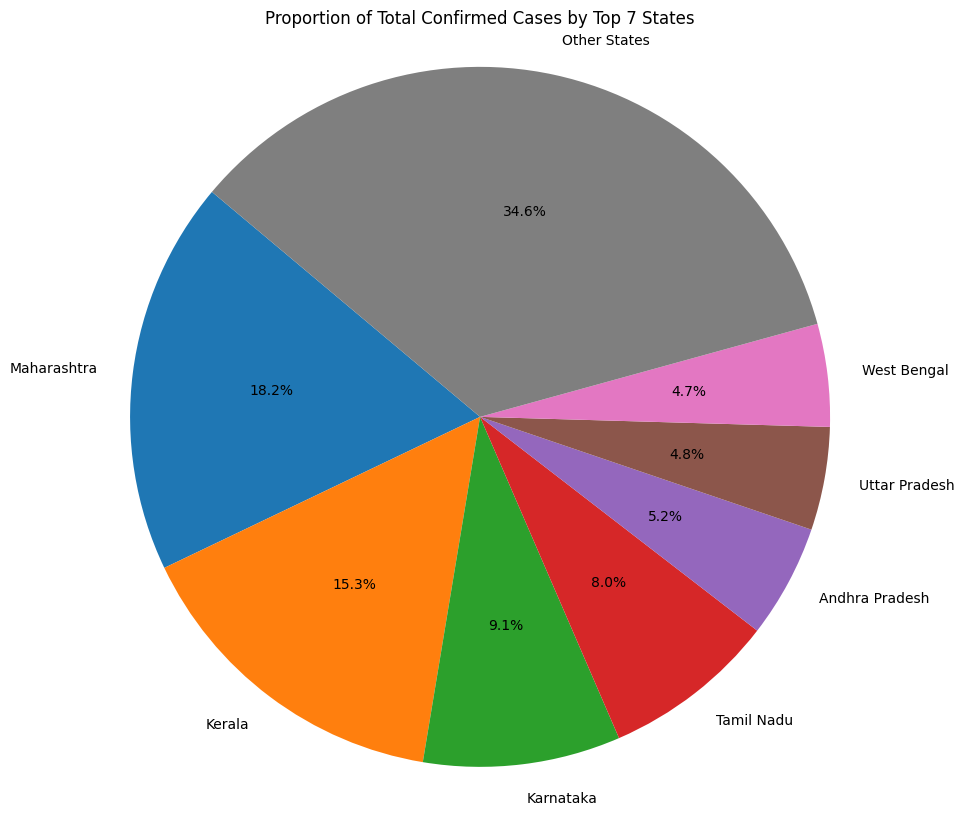

In [7]:
df_sorted = covid_df.sort_values(by='confirmed', ascending=False)
top_7 = df_sorted.head(7).copy()
others_sum = df_sorted['confirmed'][7:].sum()
others_row = pd.DataFrame([{'state': 'Other States', 'confirmed': others_sum}])
pie_data = pd.concat([top_7, others_row], ignore_index=True)

plt.figure(figsize=(12, 10))
plt.pie(pie_data['confirmed'], labels=pie_data['state'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Total Confirmed Cases by Top 7 States')
plt.axis('equal')
plt.show()
    

**Interpretation:** The pie chart effectively demonstrates the concentration of COVID-19 cases in India. To make the chart readable, it displays the top 7 states with the highest caseloads and groups the remaining 29 states and territories into a single "Other States" category. It highlights that a small number of states account for a large majority of the country's total confirmed cases.

### 7. Draw Scatter Plot: Confirmed vs. Active Cases

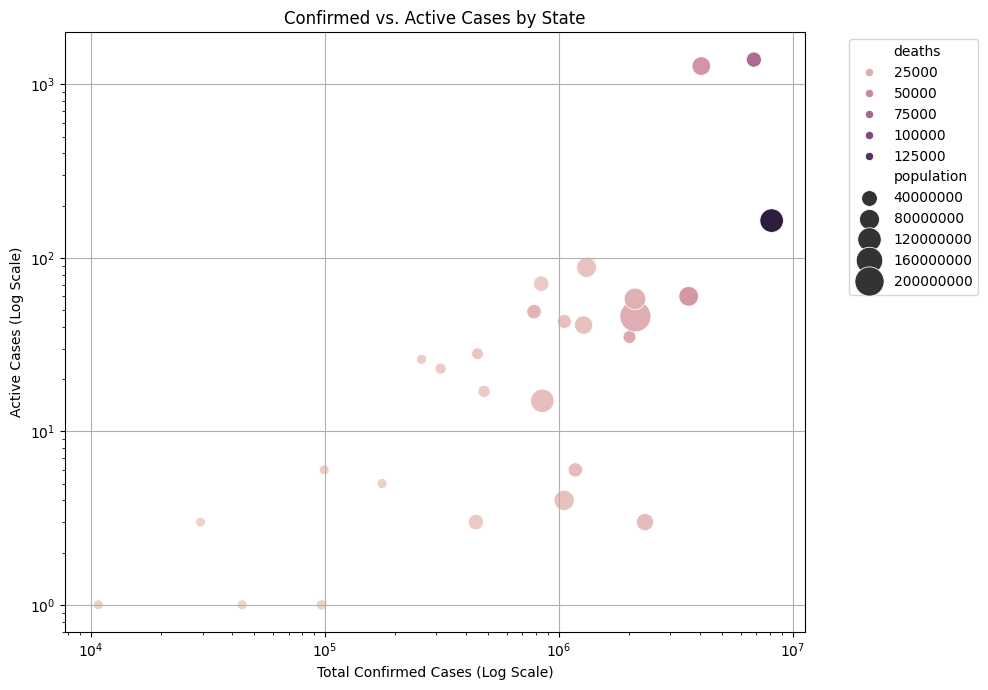

In [8]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='confirmed', y='active', data=covid_df, hue='deaths', size='population', sizes=(50, 500))
plt.title('Confirmed vs. Active Cases by State')
plt.xlabel('Total Confirmed Cases (Log Scale)')
plt.ylabel('Active Cases (Log Scale)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Interpretation:**  This scatter plot explores the relationship between the total number of confirmed cases and the number of active cases for each state. A logarithmic scale is used on both axes to better visualize the data distribution. The plot shows that states with similar total confirmed cases can have very different numbers of active cases, suggesting variations in recovery rates or the current phase of the pandemic wave in each state. The size of each bubble represents the state's population, and the color indicates the number of deaths.

### 8. Draw a pair plot

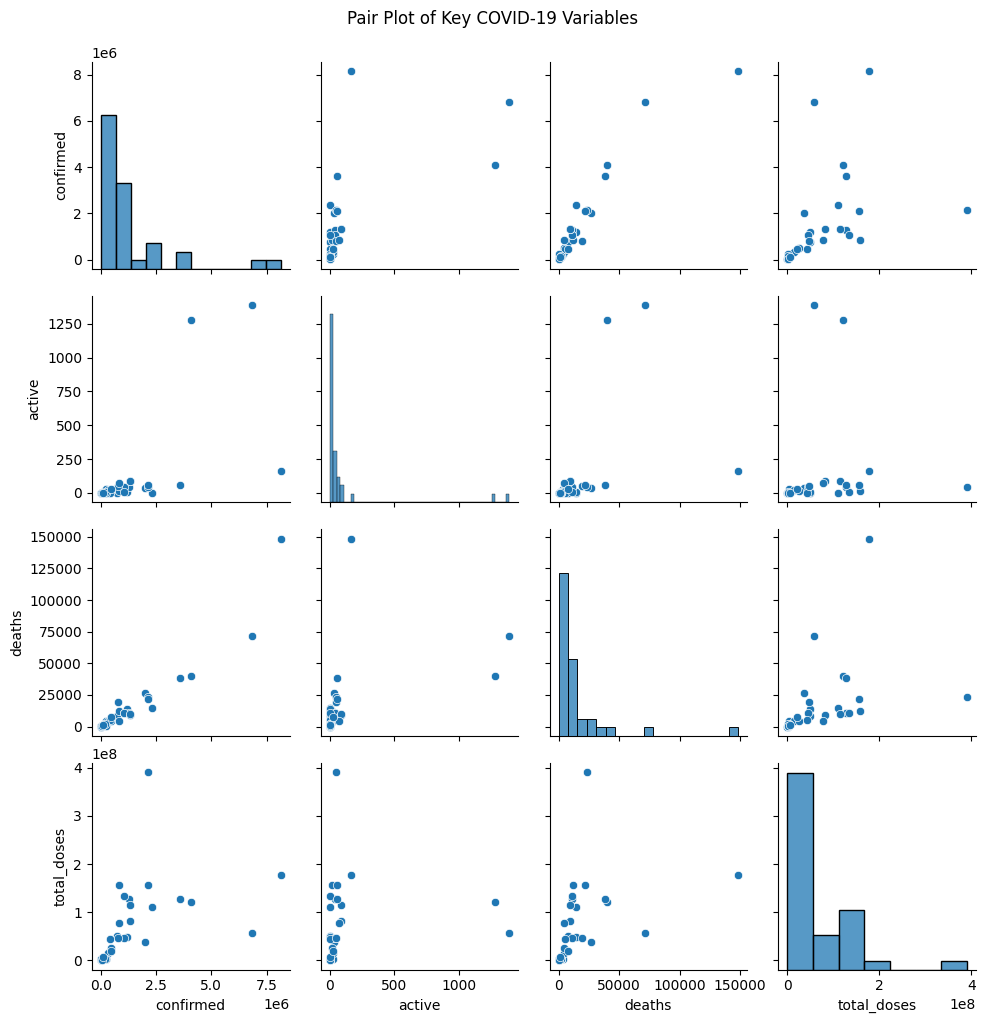

In [9]:
pairplot_cols = ['confirmed', 'active', 'deaths', 'total_doses']
sns.pairplot(covid_df[pairplot_cols])
plt.suptitle('Pair Plot of Key COVID-19 Variables', y=1.02)
plt.show()

**Interpretation:** The pair plot provides a matrix of scatter plots for key variables, allowing for a quick overview of their relationships. The diagonal shows the distribution (as a histogram) of each individual variable. We can observe strong positive correlations between confirmed cases, deaths, and total_doses, which is expected. The relationships involving active cases appear less linear, suggesting that the number of active cases is influenced by more complex factors than just the total number of confirmed cases.